<a href="https://colab.research.google.com/github/Owino-Paul/Learn_Git/blob/master/Copy_of_Copy_of_Kenya_Accidents_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [ ]:
# Install LIbrary to read excel file
!pip install xlrd
!pip install openpyxl

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kenya-accidents-database.xlsx to kenya-accidents-database.xlsx


In [ ]:
KE_Accidents = pd.read_excel('kenya-accidents-database.xlsx')
KE_Accidents.head()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1,2016-06-25,so MM/DD/YYYY is the solution :)
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1,2016-06-25,NaN
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,A & J,98.0,M/CYCLIST,1,2016-06-25,NaN
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,65,29.0,PEDESTRIAN,1,2016-06-25,NaN
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,A,10.0,PASSENGER,1,2016-06-25,NaN


In [ ]:
KE_Accidents = pd.ExcelFile('kenya-accidents-database.xlsx') # Use pd.ExcelFile to open the excel file
df_2016 = pd.read_excel(KE_Accidents, '2016') # Access the '2016' sheet
df_2017 = pd.read_excel(KE_Accidents, '2017') # Access the '2017' sheet
df = pd.concat([df_2016, df_2017], ignore_index=True) # Concatenate the DataFrames

KE_Accidents.close() # Close the ExcelFile object to release resources

KE_Accidents = df # Assign the concatenated DataFrame to KE_Accidents

KE_Accidents.head()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,BRIEF ACCIDENT DETAILS,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 12,MV INVOLVED,NAME OF VICTIM,Unnamed: 14
0,630,KITUI,MAKUENI,KITUI-ITHOKWE,KITUI SCHOOL,HEAD ON COLLISION,M,26,7.0,M/CYCLIST,1.0,2016-06-25,so MM/DD/YYYY is the solution :),NaN,NaN,NaT
1,830,VOI,TAITA TAVETA,MOMBASA-NAIROBI,IKANGA,HEAD ON COLLISION,M,28,25.0,M/CYCLIST,1.0,2016-06-25,NaN,NaN,NaN,NaT
2,1330,MARIAKANI,KILIFI,MOMBASA-NAIROBI,KATOLANI,THE UNKNOWN M/V HIT THE MOTOR CYCLE,M,A & J,98.0,M/CYCLIST,1.0,2016-06-25,NaN,NaN,NaN,NaT
3,2100,ONGATA RONGAI,NAKURU,NAKURU-NAIROBI,MAASAI LODGE,THE VEHICLE KNOCKED DOWN A PEDESTRIAN WHO WAS ...,M,65,29.0,PEDESTRIAN,1.0,2016-06-25,NaN,NaN,NaN,NaT
4,1900,MATUU,MACHAKOS,MATUU-MWINGI,KIVANDINI,THE VEHICLE OVERTOOK A M/CYCLE AND LOST CONTRO...,M,A,10.0,PASSENGER,1.0,2016-06-25,NaN,NaN,NaN,NaT


In [ ]:
# view column names
KE_Accidents.columns

Index(['TIME 24 HOURS', 'BASE/SUB BASE', 'COUNTY', 'ROAD', 'PLACE',
       'BRIEF ACCIDENT DETAILS', 'GENDER', 'AGE', 'CAUSE CODE', 'VICTIM',
       'NO.', 'Date DD/MM/YYYY', 'Unnamed: 12', 'MV INVOLVED',
       'NAME OF VICTIM', 'Unnamed: 14', 'Causes Of Accidents'],
      dtype='object')

In [ ]:
KE_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TIME 24 HOURS           1113 non-null   object        
 1   BASE/SUB BASE           1116 non-null   object        
 2   COUNTY                  1115 non-null   object        
 3   ROAD                    1115 non-null   object        
 4   PLACE                   1112 non-null   object        
 5   BRIEF ACCIDENT DETAILS  1117 non-null   object        
 6   GENDER                  1118 non-null   object        
 7   AGE                     1117 non-null   object        
 8   CAUSE CODE              1090 non-null   float64       
 9   VICTIM                  1118 non-null   object        
 10  NO.                     1118 non-null   float64       
 11  Date DD/MM/YYYY         1118 non-null   datetime64[ns]
 12  Unnamed: 12             1 non-null      object  

In [ ]:
KE_Accidents.isnull().sum()

,0
TIME 24 HOURS,5
BASE/SUB BASE,2
COUNTY,3
ROAD,3
PLACE,6
BRIEF ACCIDENT DETAILS,1
GENDER,0
AGE,1
CAUSE CODE,28
VICTIM,0



**1. Data Extraction

(i) Identify and extract cause-of-accident data (e.g., speeding, drunk driving, poor
roads).**

In [ ]:
# Show unique cause codes in the dataset
KE_Accidents['CAUSE CODE'].unique()


array([ 7., 25., 98., 29., 10., 26., 63., 58., 57., 19.,  8., 16., 14.,
       17., 20., 68., 60., 30., 22., 80., 44., 50., 78., 92., 61., 54.,
       59., 28., 71., 39., 79., nan, 81.,  6., 38.,  4., 35., 52., 69.,
       64., 66., 70., 42., 36., 15., 21., 86., 47., 11.,  1.,  9., 18.,
       72., 76., 45., 23., 13., 37., 73., 67., 53., 62., 40., 97., 12.,
       90., 51., 77., 87., 99., 89., 93., 82.])

In [ ]:
number_list = list(range(1, 101))  # Corrected typo

def identify_cause(row, number_list):
    # Convert accident details to lowercase
    details = str(row['BRIEF ACCIDENT DETAILS']).lower()

    # Check if CAUSE CODE matches any number in the number_list
    if row['CAUSE CODE'] in number_list:
        # Check for keywords in the BRIEF ACCIDENT DETAILS
        if any(keyword in details for keyword in ['collision', 'hit', 'control', 'rammed', 'left', 'knocked', 'stopped', 'fell', 'unknown']):
            # Determine cause based on keyword matching
            if 'collision' in details:
                return 'HEAD ON COLLISION'
            elif 'hit' in details:
                return 'HIT AND RUN'
            elif 'control' in details:
                return 'LOST CONTROL'
            elif 'rammed' in details:
                return 'RAMMED'
            elif 'stopped' in details:
                return 'STOPPED'
            elif 'fell' in details:
                return 'FELL DOWN'
            elif 'left' in details:
                return 'FAILED TO TURN LEFT'
            elif 'knocked' in details:
                return 'KNOCKED'
        else:
            return 'UNKNOWN'
    return 'UNKNOWN'


In [ ]:
KE_Accidents['Causes Of Accidents'] = KE_Accidents.apply(identify_cause, args=(number_list,), axis=1)
summary = KE_Accidents.groupby(['CAUSE CODE', 'BRIEF ACCIDENT DETAILS', 'Causes Of Accidents']
).size().reset_index(name='Total Occurrences')
summary = summary.sort_values(by='Total Occurrences', ascending=False)
summary.head()

,CAUSE CODE,BRIEF ACCIDENT DETAILS,Causes Of Accidents,Total Occurrences
563,98.0,HIT AND RUN,HIT AND RUN,58
616,98.0,THE VEHICLE KNOCKED DOWN THE VICTIM,KNOCKED,50
80,10.0,HEAD ON COLLISION,HEAD ON COLLISION,29
46,8.0,HEAD ON COLLISION,HEAD ON COLLISION,23
427,60.0,THE VEHICLE KNOCKED DOWN THE VICTIM,KNOCKED,21


Data Cleaning:

● Standardize cause-of-accident categories.

● Merge similar causes to reduce category noise

In [ ]:
# Standardising the Cause of accidents column
KE_Accidents['Causes Of Accidents'] = KE_Accidents['Causes Of Accidents'].astype(str).str.lower().str.strip().str.replace(r'\s+', ' ', regex=True)
print(KE_Accidents['Causes Of Accidents'])


0       head on collision
1       head on collision
2             hit and run
3                 knocked
4            lost control
              ...        
1113              knocked
1114          hit and run
1115              knocked
1116              unknown
1117              knocked
Name: Causes Of Accidents, Length: 1118, dtype: object


In [ ]:
# (i) Remove special characters and condense whitespace
KE_Accidents['Causes Of Accidents'] = KE_Accidents['Causes Of Accidents'].str.replace(r'[^\w\s]', '', regex=True)
KE_Accidents['Causes Of Accidents'] = KE_Accidents['Causes Of Accidents'].str.replace(r'\s+', ' ', regex=True).str.strip()

# (ii) Standardize synonyms
Accident_Causes = {
    'hit and run': 'hit and run',
    'control': 'lost control',
    'veering': 'lost control',
    'knocked down': 'knocked',
    'unknown': 'unknown',
    'collision': 'head on collision',
    'failed to turn left': 'failed to keep left',
    'rammed': 'rammed',
    'tyre burst': 'lost control',
    'fell down': 'fell down',
    'vehicle lost control': 'lost control'
}
KE_Accidents['Causes Of Accidents'] = KE_Accidents['Causes Of Accidents'].replace(Accident_Causes)
KE_Accidents['Causes Of Accidents'] = KE_Accidents['Causes Of Accidents'].apply(lambda x: ' '.join(dict.fromkeys(x.split())))
print(KE_Accidents['Causes Of Accidents'])

0         head on collison
1         head on collison
2       hit and runand run
3                  knocked
4             lost control
               ...        
1113               knocked
1114    hit and runand run
1115               knocked
1116               unknown
1117               knocked
Name: Causes Of Accidents, Length: 1118, dtype: object


In [ ]:
import re

# Step 1: Remove special characters and condense whitespace
KE_Accidents['Causes Of Accidents'] = KE_Accidents['Causes Of Accidents'].str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters
KE_Accidents['Causes Of Accidents'] = KE_Accidents['Causes Of Accidents'].str.replace(r'\s+', ' ', regex=True).str.strip()  # Condense spaces

# Step 2: Use a regex to remove repeated words/phrases
KE_Accidents['Causes Of Accidents'] = KE_Accidents['Causes Of Accidents'].apply(lambda x: re.sub(r'\b(\w+)( \1\b)+', r'\1', x))

# Step 3: Standardize synonyms
Accident_Causes = {
    'control': 'lost control',
    'veering': 'lost control',
    'knocked down': 'knocked',
    'unknown': 'unknown',
    'collision': 'head on collision',
    'failed to turn left': 'failed to keep left',
    'rammed': 'rammed',
    'tyre burst': 'lost control',
    'fell down': 'fell down',
    'hit and run': 'hit and run',
    'vehicle lost control': 'lost control'
}
KE_Accidents['Causes Of Accidents'] = KE_Accidents['Causes Of Accidents'].replace(Accident_Causes)

print(KE_Accidents['Causes Of Accidents'])


0         head on collison
1         head on collison
2       hit and runand run
3                  knocked
4             lost control
               ...        
1113               knocked
1114    hit and runand run
1115               knocked
1116               unknown
1117               knocked
Name: Causes Of Accidents, Length: 1118, dtype: object


Data Transformation:

● Group data by cause and total fatalities.

● Create a severity score (e.g., deaths per accident per cause).

In [ ]:
# Group data by cause and total fatalities - Rename COLUMN (No.) to (Total Fatalities)
Fatalities = KE_Accidents.groupby('Causes Of Accidents', as_index=False).agg({'NO.': 'sum'}).rename(columns={'NO.': 'Total Fatalities'})
print(Fatalities)

   Causes Of Accidents  Total Fatalities
0  failed to keep left               1.0
1            fell down              26.0
2     head on collison             159.0
3   hit and runand run             327.0
4              knocked             355.0
5         lost control             182.0
6               rammed              64.0
7              unknown             202.0


In [ ]:
# Count total accidents for each cause
Fatalities['Total Accidents'] = KE_Accidents.groupby('Causes Of Accidents')['NO.'].count().values
print(Fatalities)

   Causes Of Accidents  Total Fatalities  Total Accidents
0  failed to keep left               1.0                1
1            fell down              26.0               21
2     head on collison             159.0              129
3   hit and runand run             327.0              287
4              knocked             355.0              353
5         lost control             182.0              143
6               rammed              64.0               52
7              unknown             202.0              132


In [ ]:
# Group by accident cause to calculate total fatalities and total accidents per cause - Severity Score
S_Score = KE_Accidents.groupby('Causes Of Accidents').agg({'NO.': ['sum', 'count']}).reset_index()
S_Score.columns = ['Cause', 'Total Fatalities', 'Total Accidents']
S_Score['Severity Score'] = S_Score['Total Fatalities'] / S_Score['Total Accidents']
S_Score = S_Score .sort_values(by='Severity Score', ascending=False)
print(S_Score )

                 Cause  Total Fatalities  Total Accidents  Severity Score
7              unknown             202.0              132        1.530303
5         lost control             182.0              143        1.272727
1            fell down              26.0               21        1.238095
2     head on collison             159.0              129        1.232558
6               rammed              64.0               52        1.230769
3   hit and runand run             327.0              287        1.139373
4              knocked             355.0              353        1.005666
0  failed to keep left               1.0                1        1.000000


Data Analysis:

● Identify the most frequent and most deadly accident causes.

● Compare average severity scores across causes

In [ ]:
# Count occurrences of each cause
Frequency = KE_Accidents['Causes Of Accidents'].value_counts().reset_index()
Frequency.columns = ['Cause', 'Frequency']
print(Frequency)

                 Cause  Frequency
0              knocked        353
1   hit and runand run        287
2         lost control        143
3              unknown        132
4     head on collison        129
5               rammed         52
6            fell down         21
7  failed to keep left          1


In [ ]:
# Identifying most deadly accident causes
# Total fatalities by cause
deadly_cause = KE_Accidents.groupby('Causes Of Accidents')['NO.'].sum().reset_index()
deadly_cause.columns = ['Cause', 'Total Fatalities']
deadly_data = deadly_cause.sort_values(by='Total Fatalities', ascending=False)
print(deadly_cause)


                 Cause  Total Fatalities
0  failed to turn left               1.0
1            fell down              26.0
2     head on collison             159.0
3  hit and run and run             327.0
4              knocked             355.0
5         lost control             182.0
6               rammed              64.0
7              unknown             202.0


In [ ]:
# Compare average severity scores across causes
# Calculate total accidents and total fatalities per cause
severity_data = KE_Accidents.groupby('Causes Of Accidents').agg({'NO.': ['sum', 'count']}).reset_index()
severity_data.columns = ['Cause', 'Total Fatalities', 'Total Accidents']
severity_data['Severity Score'] = severity_data['Total Fatalities'] / severity_data['Total Accidents']
severity_data = severity_data.sort_values(by='Severity Score', ascending=False)
print(severity_data)

                 Cause  Total Fatalities  Total Accidents  Severity Score
7              unknown             202.0              132        1.530303
5         lost control             182.0              142        1.281690
1            fell down              26.0               21        1.238095
2     head on collison             159.0              129        1.232558
6               rammed              64.0               52        1.230769
3  hit and run and run             327.0              285        1.147368
4              knocked             355.0              352        1.008523
0  failed to turn left               1.0                1        1.000000


Data Visualization:

● Create a horizontal bar chart showing causes vs. total deaths.

● Use a scatter plot to compare frequency vs. severity for each cause.


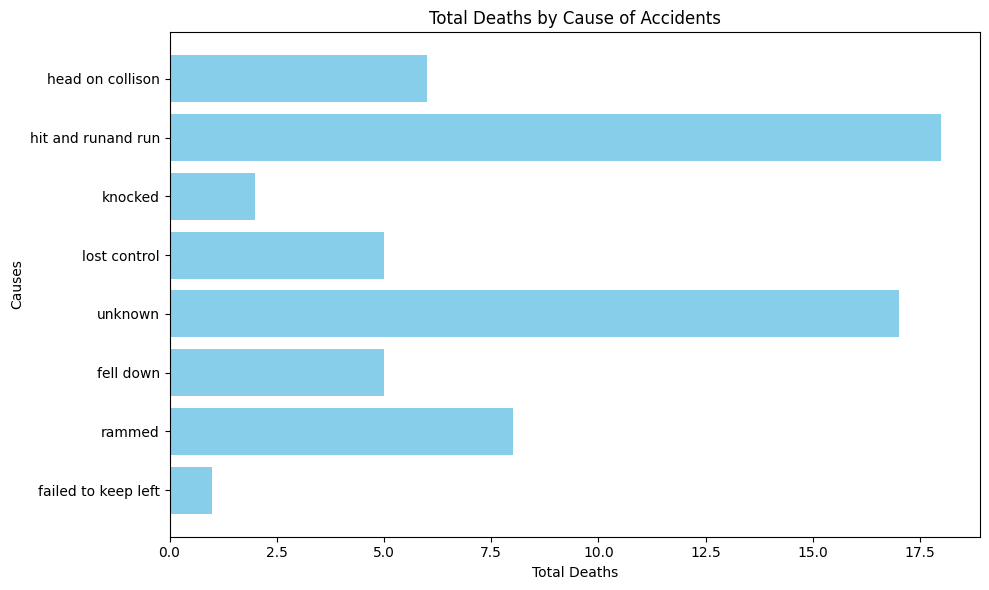

In [ ]:
# 1. Horizontal Bar Chart showing causes vs total deaths
import matplotlib.pyplot as plt
KE_Accidents['NO.'] = KE_Accidents['NO.'].fillna(0)
# Horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(KE_Accidents['Causes Of Accidents'], KE_Accidents['NO.'], color='skyblue')
plt.title('Total Deaths by Cause of Accidents')
plt.xlabel('Total Deaths')
plt.ylabel('Causes')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()



In [ ]:
# Print unique values of 'Severity Score' from the severity_data DataFrame
print(severity_data['Severity Score'].unique())

[1.53030303 1.28169014 1.23809524 1.23255814 1.23076923 1.14736842
 1.00852273 1.        ]


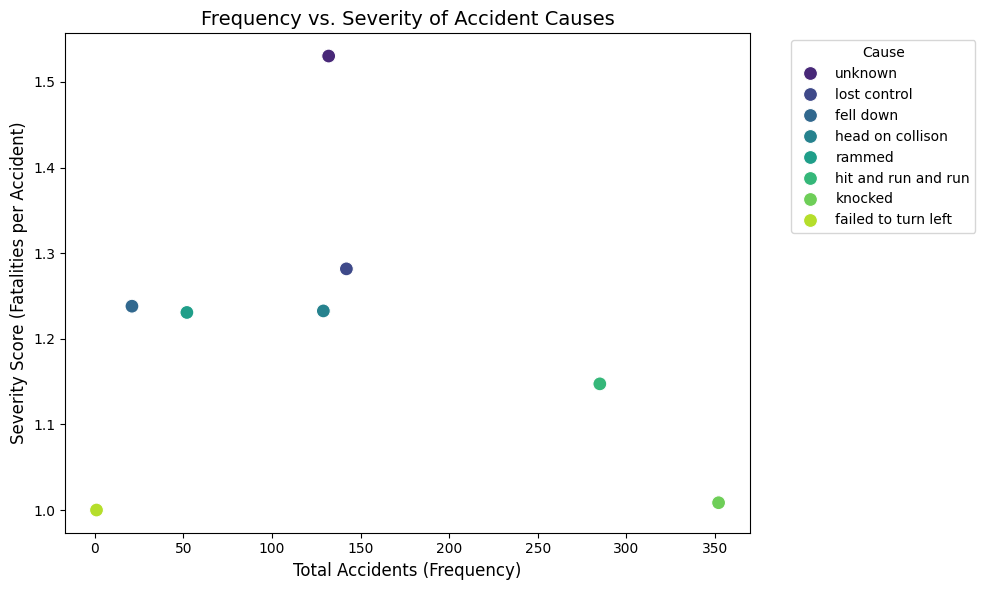

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=severity_data['Total Accidents'],
    y=severity_data['Severity Score'],
    hue=severity_data['Cause'],
    palette='viridis',
    s=100
)
plt.title('Frequency vs. Severity of Accident Causes', fontsize=14)
plt.xlabel('Total Accidents (Frequency)', fontsize=12)
plt.ylabel('Severity Score (Fatalities per Accident)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cause')
plt.tight_layout()
plt.show()
